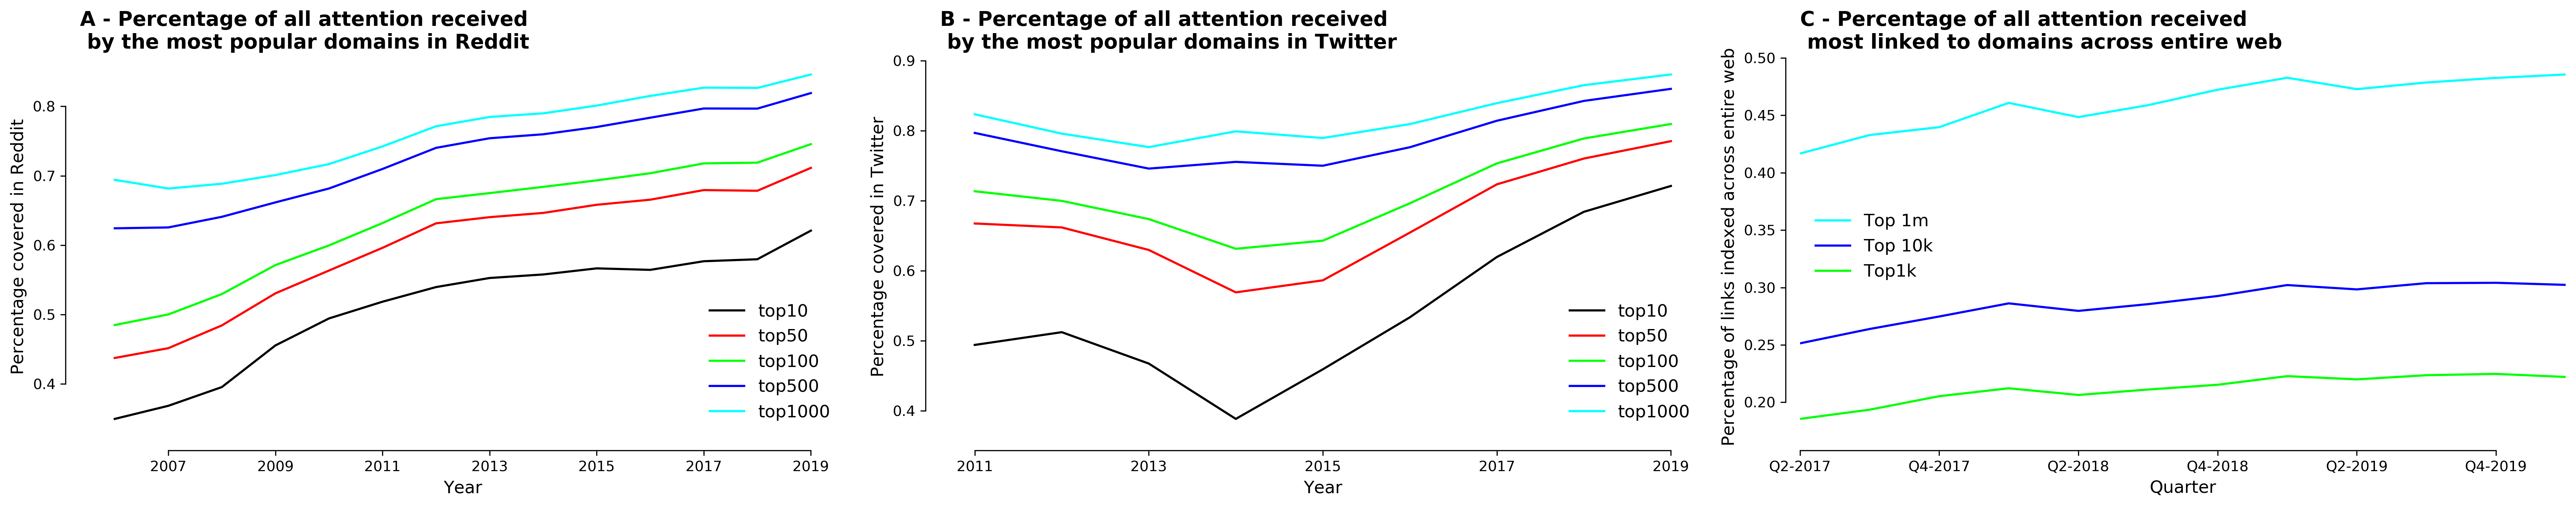

In [30]:
# Load Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import powerlaw

%matplotlib inline
plt.rcParams['figure.dpi'] = 300

# Load Reddit Data
df_reddit = pd.read_csv('outputFiles/reddit.csv.xz')
df_reddit_plot = df_reddit[['Domain']]
df_reddit.set_index('Domain', inplace = True)

reddit_year_list = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019', 'All']
top10_list = []
top50_list = []
top100_list = []
top500_list = []
top1000_list = []
for year in reddit_year_list:
    if year != 'All':
        df_reddit_plot[year] = df_reddit.loc[:,df_reddit.columns.str.contains(year)].sum(axis = 1).tolist()
        top10_list.append(df_reddit_plot[year].sort_values(ascending = False).head(10).sum()/df_reddit_plot[year].sum())
        top50_list.append(df_reddit_plot[year].sort_values(ascending = False).head(50).sum()/df_reddit_plot[year].sum())
        top100_list.append(df_reddit_plot[year].sort_values(ascending = False).head(100).sum()/df_reddit_plot[year].sum())
        top500_list.append(df_reddit_plot[year].sort_values(ascending = False).head(500).sum()/df_reddit_plot[year].sum())
        top1000_list.append(df_reddit_plot[year].sort_values(ascending = False).head(1000).sum()/df_reddit_plot[year].sum())
    else:
        df_reddit_plot[year] = df_reddit.loc[:,df_reddit.columns.str.contains('|'.join(reddit_year_list[:-1]))].sum(axis = 1).tolist()
        
df_reddit_top_percent_trend = pd.DataFrame([reddit_year_list[:-1],top10_list,top50_list,top100_list, top500_list, top1000_list]).transpose()
df_reddit_top_percent_trend.columns = ['Year','top10','top50','top100','top500','top1000']
df_reddit_top_percent_trend.set_index('Year', inplace = True)
df_reddit_top_percent_trend = df_reddit_top_percent_trend.apply(pd.to_numeric)

# Load Twitter Data
df_twitter1 = pd.read_csv('outputFiles/twitter.csv.1.xz')
df_twitter2 = pd.read_csv('outputFiles/twitter.csv.2.xz')
df_twitter = pd.concat([df_twitter1, df_twitter2], axis = 0)
df_twitter_plot = df_twitter[['Domain']]
df_twitter.set_index('Domain', inplace = True)

twitter_year_list = ['2011','2012','2013','2014','2015','2016','2017','2018','2019', 'All']
top10_list = []
top50_list = []
top100_list = []
top500_list = []
top1000_list = []
for year in twitter_year_list:
    if year != 'All':
        df_twitter_plot[year] = df_twitter.loc[:,df_twitter.columns.str.contains(year)].sum(axis = 1).tolist()
        top10_list.append(df_twitter_plot[year].sort_values(ascending = False).head(10).sum()/df_twitter_plot[year].sum())
        top50_list.append(df_twitter_plot[year].sort_values(ascending = False).head(50).sum()/df_twitter_plot[year].sum())
        top100_list.append(df_twitter_plot[year].sort_values(ascending = False).head(100).sum()/df_twitter_plot[year].sum())
        top500_list.append(df_twitter_plot[year].sort_values(ascending = False).head(500).sum()/df_twitter_plot[year].sum())
        top1000_list.append(df_twitter_plot[year].sort_values(ascending = False).head(1000).sum()/df_twitter_plot[year].sum())
    else:
        df_twitter_plot[year] = df_twitter.loc[:,df_twitter.columns.str.contains('|'.join(twitter_year_list[:-1]))].sum(axis = 1).tolist()
        

df_twitter_top_percent_trend = pd.DataFrame([twitter_year_list[:-1],top10_list,top50_list,top100_list, top500_list, top1000_list]).transpose()
df_twitter_top_percent_trend.columns = ['Year','top10','top50','top100','top500','top1000']
df_twitter_top_percent_trend.set_index('Year', inplace = True)
df_twitter_top_percent_trend = df_twitter_top_percent_trend.apply(pd.to_numeric)

# Load CommonCrawl Data
df_cc = pd.read_csv('outputFiles/commoncrawl.csv.xz')

timeline = df_cc.columns.tolist()[1:]
sum_pr_top1m = []
sum_pr_10k = []
sum_pr_1k = []
for i in timeline:
    df = df_cc[~df_cc[i].isna()][['Domains',i]].sort_values(i, ascending = False)
    sum_pr_top1m.append(df[i].sum())
    sum_pr_10k.append(df.head(10000)[i].sum())
    sum_pr_1k.append(df.head(1000)[i].sum())
    
df_pr_trend = pd.DataFrame([timeline,sum_pr_top1m,sum_pr_10k,sum_pr_1k]).transpose()
df_pr_trend.columns = ['Year','Top 1m','Top 10k','Top1k']

# Fig2 in paper
fig_trend, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(25,5))

sns.lineplot(data=df_reddit_top_percent_trend, ax = ax1, palette = ['k','r','lime','b','cyan'], dashes=False)
ax1.set_xticks(['2007','2009','2011','2013','2015','2017', '2019'])
ax1.set_xlabel('Year', fontdict = {'fontsize': 12})
ax1.set_ylabel('Percentage covered in Reddit', fontdict = {'fontsize': 12})
ax1.set_title('A - Percentage of all attention received \n by the most popular domains in Reddit' , 
              loc = 'left', fontdict = {'fontsize': 14, 'fontweight': 'bold', 'horizontalalignment': 'left'})
sns.despine(offset=10, trim=True,  ax = ax1)
legend1 = ax1.legend(prop={'size': 12})
frame1 = legend1.get_frame()
frame1.set_facecolor('white')
frame1.set_edgecolor('white')


sns.lineplot(data=df_twitter_top_percent_trend, ax = ax2, palette = ['k','r','lime','b','cyan'], dashes=False)
ax2.set_xticks(['2011','2013','2015','2017', '2019'])
ax2.set_xlabel('Year', fontdict = {'fontsize': 12})
ax2.set_ylabel('Percentage covered in Twitter', fontdict = {'fontsize': 12})
ax2.set_title('B - Percentage of all attention received \n by the most popular domains in Twitter' , 
              loc = 'left', fontdict = {'fontsize': 14, 'fontweight': 'bold', 'horizontalalignment': 'left'})
sns.despine(offset=10, trim=True,  ax = ax2)
# legend2 = ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})
legend2 = ax2.legend(loc='lower right', prop={'size': 12})
frame2 = legend2.get_frame()
frame2.set_facecolor('white')
frame2.set_edgecolor('white')


df_pr_trend.set_index('Year').plot(color = ['cyan','blue','lime'], ax = ax3)
ax3.set_xlabel('Quarter', fontdict = {'fontsize': 12})
ax3.set_ylabel('Percentage of links indexed across entire web', fontdict = {'fontsize': 12})
ax3.set_title('C - Percentage of all attention received \n most linked to domains across entire web' , 
              loc = 'left', fontdict = {'fontsize': 14, 'fontweight': 'bold', 'horizontalalignment': 'left'})
sns.despine(offset=10, trim=True,  ax = ax3)
legend3 = ax3.legend(frameon = 1, loc = 'center left', prop={'size': 12})
frame3 = legend3.get_frame()
frame3.set_facecolor('white')
frame3.set_edgecolor('white')
plt.tight_layout()
